In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
file_path = 'C:\\Users\\wdd45\\OneDrive\\바탕 화면\\Raisin_Dataset\\Raisin_Dataset.xlsx'

data= pd.read_excel(file_path)
print(data)

data.head()

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2  

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [9]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Label')

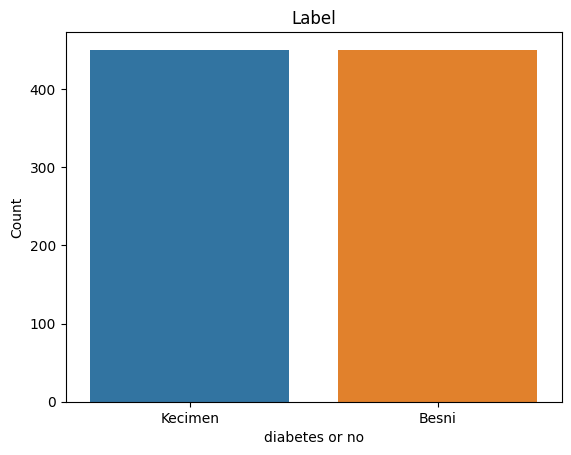

In [10]:
sns.countplot(data = data, x="Class")
plt.xlabel("diabetes or no")
plt.ylabel("Count")
plt.title("Label")

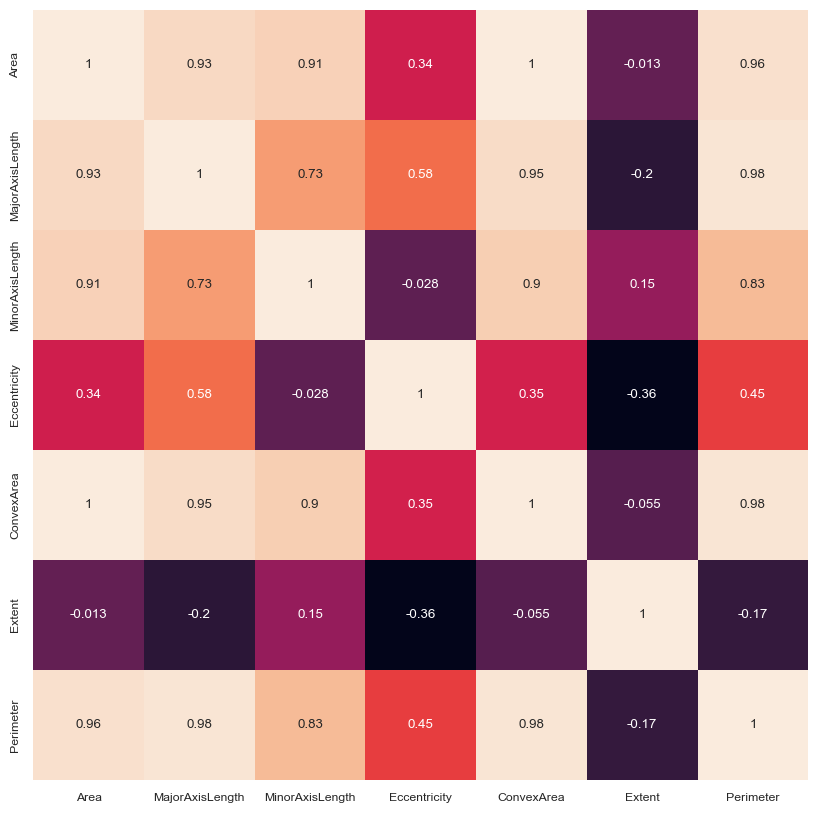

In [11]:
df_corr = data.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in data.columns:

    data[i]=le.fit_transform(data[i])

In [23]:
#Splitting the data into training and test test
X = data.iloc[:,0:7].values
y = data.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [24]:
X

array([[551, 553, 500, ..., 542, 811, 544],
       [404, 446, 409, ..., 413, 299, 453],
       [583, 554, 581, ..., 571, 102, 573],
       ...,
       [640, 517, 739, ..., 650, 722, 656],
       [600, 633, 506, ..., 600, 177, 622],
       [529, 706, 200, ..., 532,  82, 643]], dtype=int64)

In [25]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 7)                 56        
                                                                 
 dense_53 (Dense)            (None, 7)                 56        
                                                                 
 dense_54 (Dense)            (None, 7)                 56        
                                                                 
 dense_55 (Dense)            (None, 2)                 16        
                                                                 
Total params: 184
Trainable params: 184
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/23 [>.............................] - ETA: 9s - loss: 49.5645 - accuracy: 0.7188WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002163F027D38> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 0s 1ms/step


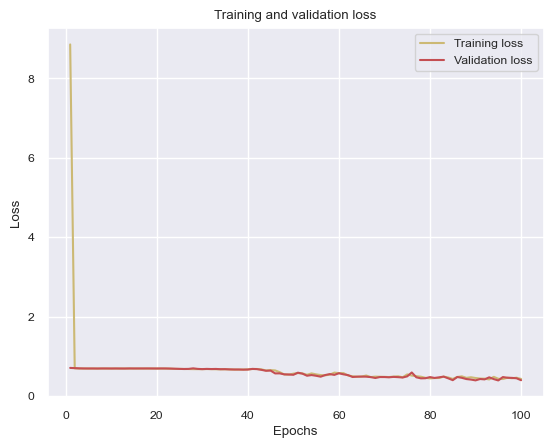

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        97
           1       0.88      0.86      0.87        83

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180

[[87 10]
 [12 71]]
